## 로지스틱 회귀(Logistic Regression)

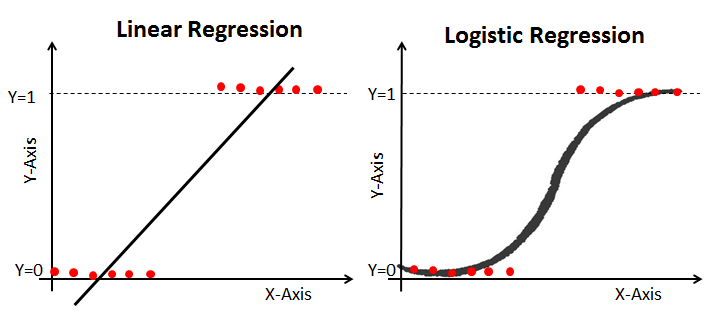
https://pywind.github.io/Logistic-Regression/

로지스틱 회귀(Logistic Regression)는 종속 변수가 이항 분포를 따를 때 사용되는 통계적인 회귀 분석 기법입니다. 이진 분류 문제를 다루는데 주로 사용되며, 예측하고자 하는 변수가 0 또는 1과 같은 이진 값으로 표현되는 경우에 적합한 알고리즘입니다.

로지스틱 회귀는 선형 회귀와 달리 종속 변수의 값을 0과 1 사이의 값으로 변환하는 로지스틱 함수 또는 시그모이드 함수를 사용합니다. 이 함수는 입력 값에 대해 S자 형태의 곡선을 그리는데, 이를 통해 이진 분류를 수행하는데 적합한 확률 값을 얻을 수 있습니다.

로지스틱 회귀 모델은 독립 변수와 가중치의 선형 조합을 로지스틱 함수에 입력으로 사용하여 확률을 계산합니다. 확률은 0과 1 사이의 값으로 표현되며, 보통 0.5를 기준으로 0.5보다 크면 1로 분류하고 0.5보다 작으면 0으로 분류합니다.

로지스틱 회귀는 최적화 알고리즘을 사용하여 모델을 학습시킵니다. 학습 과정에서는 가중치를 조정하여 로지스틱 함수의 출력이 실제 데이터와 최대한 일치하도록 합니다. 일반적으로 최대 우도 추정(Maximum Likelihood Estimation)을 사용하여 모델을 적합시키는데, 이는 주어진 데이터에서 발생 가능성이 가장 높은 가중치 값을 찾는 것을 의미합니다.

로지스틱 회귀는 단순하면서도 강력한 모델로, 이해하기 쉽고 해석하기도 용이합니다. 또한, 계수의 해석을 통해 독립 변수들의 영향력을 파악할 수 있어 유용합니다. 파이썬의 Scikit-learn 라이브러리를 통해 로지스틱 회귀 모델을 구현하고 사용할 수 있습니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_pred_proba)))

accuracy: 0.977
roc_auc: 0.995


In [ ]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


# 로지스틱 회귀 트리(Logistic Regression Tree)
로지스틱 회귀 트리(Logistic Regression Tree)는 회귀 분석과 결정 트리를 결합한 알고리즘입니다. 이 모델은 회귀 분석에서 사용되는 로지스틱 회귀 방법을 각 결정 트리의 리프 노드에서 적용하여 예측을 수행합니다.

로지스틱 회귀는 이진 분류 문제에서 확률 값을 예측하는 모델입니다. 이 모델은 입력 변수의 선형 결합에 로지스틱 함수를 적용하여 예측 확률을 계산합니다. 로지스틱 회귀 트리는 이 로지스틱 회귀 방법을 결정 트리의 리프 노드에 적용합니다.

로지스틱 회귀 트리의 동작은 다음과 같습니다:

1. 데이터를 사용하여 결정 트리를 생성합니다.
2. 각 리프 노드에 대해 로지스틱 회귀 모델을 학습합니다. 이 모델은 해당 리프 노드에 속한 데이터 포인트의 라벨(0 또는 1)을 예측하는 데 사용됩니다.
3. 새로운 데이터 포인트가 주어지면 결정 트리를 통해 해당 리프 노드를 찾고, 해당 리프 노드에 연결된 로지스틱 회귀 모델을 사용하여 예측 확률을 계산합니다.

로지스틱 회귀 트리는 결정 트리의 장점과 로지스틱 회귀의 장점을 결합한 모델입니다. 결정 트리의 장점인 해석력과 특성 중요도 평가를 할 수 있는 기능을 가지고 있으며, 로지스틱 회귀의 장점인 이진 분류 문제에 대한 확률 예측을 수행할 수 있는 능력을 가지고 있습니다.

로지스틱 회귀 트리는 데이터가 복잡하고 비선형적인 관계를 가지는 경우에 유용하게 사용될 수 있습니다. 결정 트리의 분할 기준으로는 주로 지니 불순도나 엔트로피를 사용하며, 로지스틱 회귀 모델은 리프 노드에서 학습되므로 선형 결합에 로지스틱 함수를 적용할 수 있습니다.

로지스틱 회귀 트리는 다양한 응용 분야에서 사용될 수 있습니다. 예를 들어, 의학 분야에서는 환자의 진단 결과를 기반으로 질병의 발생 확률을 예측하는 데 사용될 수 있습니다. 또한, 마케팅 분야에서는 고객의 특성을 기반으로 제품 구매 확률을 예측하는 데 활용될 수 있습니다.

로지스틱 회귀 트리는 데이터의 특성과 목표에 따라 적합한 분석 방법일 수 있으며, 트리의 깊이나 분할 기준 등을 조정하여 모델의 복잡도를 제어할 수 있습니다. 이를 통해 모델의 일반화 성능을 향상시킬 수 있습니다.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
[20:46:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


RM         0.436311
LSTAT      0.367971
DIS        0.066330
CRIM       0.037331
NOX        0.023618
PTRATIO    0.016565
TAX        0.014784
AGE        0.013345
B          0.011788
INDUS      0.006097
RAD        0.003780
ZN         0.001129
CHAS       0.000951
dtype: float64


<AxesSubplot:>

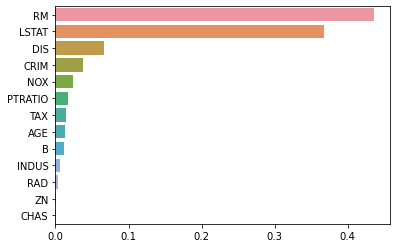

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
print(feature_series)
sns.barplot(x= feature_series, y=feature_series.index)


(100, 2)


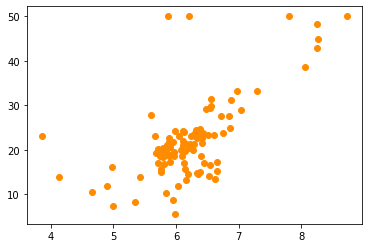

In [ ]:
import matplotlib.pyplot as plt

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


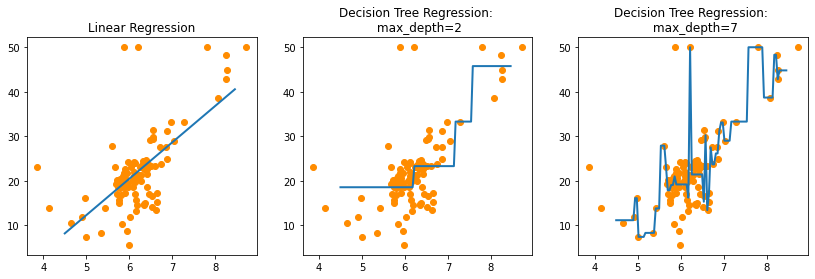

In [ ]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

In [ ]:
# SVM 회귀
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.metrics import mean_squared_error

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.2,random_state=11)

svr = SVR(kernel='linear',C=1,epsilon=0.1) # epsilon은 도로의 폭을 조절하며 작을수록 마진을 작게한다.
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

26.6228440113059


In [ ]:
X_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
# 예측
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print(svr.predict([test_data]))

[18.70692863]


In [ ]:
neg_mse_scores = cross_val_score(svr, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.84 -24.79 -35.13 -74.51 -24.4 ]
 5 교차 검증의 개별 RMSE scores :  [2.8  4.98 5.93 8.63 4.94]
 5 교차 검증의 평균 RMSE : 5.456 


In [ ]:
coef = np.ravel(svr.coef_,order='C') # 다차원 배열을 1차원 배열로 변환
coeff = pd.Series(data=np.round(coef,2), index=X_data.columns)
feature_series = coeff.sort_values(ascending=False)
feature_series

RM         5.03
CHAS       1.51
RAD        0.20
ZN         0.03
B          0.01
TAX       -0.01
AGE       -0.02
INDUS     -0.02
CRIM      -0.14
LSTAT     -0.38
PTRATIO   -0.64
DIS       -0.84
NOX       -2.78
dtype: float64

<AxesSubplot:>

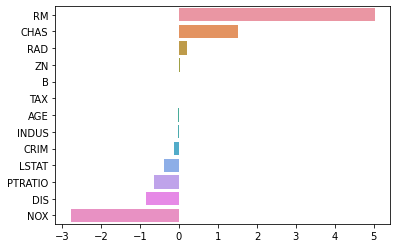

In [ ]:
sns.barplot(x= feature_series, y=feature_series.index)